# 서울시 cctv현황 데이터 분석

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus']=False
mpl.rc('font',family='Malgun Gothic')
%matplotlib inline

## 1.서울통계서비스 사이트에서 '주민등록인구(구별)' 통계에서 2018년도 데이터를 다운 받아서
   ## '서울시 인구현황.txt' 파일로 저장한다.

## 2. 파일에서 데이터를 읽어 컬럼이 '자치구', '인구수', '내국인', '외국인', '고령자' 인 데이터 프레임을 만든다.(pop)


In [28]:
pop = pd.read_csv('서울시 인구현황.txt', sep='\t', thousands=',',
                  usecols=[1,3,6,9,13], skiprows=[0,1,2,3], 
                  names=['자치구','인구수','내국인','외국인','고령자'])
pop.head()

,자치구,인구수,내국인,외국인,고령자
0,종로구,161984,151217,10767,28073
1,중구,136469,126175,10294,23794
2,용산구,246165,229579,16586,39439
3,성동구,307193,299042,8151,44728
4,광진구,365990,350417,15573,48989


## 3. 외국인 비율과 고령자 비율을 추가한다.


In [29]:
pop['외국인 비율'] = pop['외국인'] / pop['인구수'] * 100
pop['고령자 비율'] = pop['고령자'] / pop['인구수'] * 100
pop.head()

,자치구,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
0,종로구,161984,151217,10767,28073,6.646953,17.330724
1,중구,136469,126175,10294,23794,7.543105,17.435462
2,용산구,246165,229579,16586,39439,6.737757,16.021368
3,성동구,307193,299042,8151,44728,2.653381,14.560228
4,광진구,365990,350417,15573,48989,4.255034,13.385338


# 4. 서울시 자치구 년도별 CCTV 설치 현황 데이터를 다운 받아서
   # '서울시 자치구 년도별 CCTV 설치 현황.xlsx' 파일로 저장한후, 데이터를 읽서 데이터 프레임을 만든다.(cctv)


In [4]:
import numpy as np
import pandas as pd

In [30]:

cctv = pd.read_excel('서울시 자치구 년도별 CCTV 설치 현황.xlsx')
cctv.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [6]:
cctv['기관명'].unique()

array(['강 남 구', '강 동 구', '강 북 구', '강 서 구', '관 악 구', '광 진 구', '구 로 구',
       '금 천 구', '노 원 구', '도 봉 구', '동대문구', '동 작 구', '마 포 구', '서대문구',
       '서 초 구', '성 동 구', '성 북 구', '송 파 구', '양 천 구', '영등포구', '용 산 구',
       '은 평 구', '종 로 구', '중     구', '중 랑 구'], dtype=object)

In [32]:
cctv['기관명']  = [x.replace(' ', '') for x in cctv['기관명'].unique()]
cctv.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [8]:
cctv.rename(columns={'기관명':'자치구'},inplace=True)
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [9]:
##6번문제



cctv[['2011년 이전','2012년','2013년']]=\
    cctv[['2011년 이전','2012년','2013년']].fillna(0).astype(int)

cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944,195,316,430,546,765,577,448
1,강 동 구,1879,303,387,134,59,144,194,273,385
2,강 북 구,1265,243,88,141,74,145,254,1,319
3,강 서 구,1617,219,155,118,230,187,190,264,254
4,관 악 구,3985,430,56,419,487,609,619,694,671
5,광 진 구,1581,470,42,83,87,64,21,468,346
6,구 로 구,3227,852,219,349,187,268,326,540,486
7,금 천 구,1634,27,17,242,101,382,136,199,530
8,노 원 구,1906,481,117,203,80,461,298,110,156
9,도 봉 구,858,197,66,8,185,59,155,117,71


In [10]:
cctv['2015년 이전']=cctv[['2011년 이전','2012년','2013년','2014년','2015년']].sum(axis=1)
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전
0,강 남 구,5221,1944,195,316,430,546,765,577,448,3431
1,강 동 구,1879,303,387,134,59,144,194,273,385,1027
2,강 북 구,1265,243,88,141,74,145,254,1,319,691
3,강 서 구,1617,219,155,118,230,187,190,264,254,909
4,관 악 구,3985,430,56,419,487,609,619,694,671,2001


In [33]:
cctv['최근 3개년'] = cctv[['2016년','2017년','2018년']].sum(axis=1)
cctv['최근 증가율'] = cctv['최근 3개년'] / cctv['2015년 이전'] * 100
cctv.head()


KeyError: '2015년 이전'

In [7]:
cctv['기관명']=['강 남 구', '강 동 구', '강 북 구', '강 서 구', '관 악 구', '광 진 구', '구 로 구',
       '금 천 구', '노 원 구', '도 봉 구', '동대문구', '동 작 구', '마 포 구', '서대문구',
       '서 초 구', '성 동 구', '성 북 구', '송 파 구', '양 천 구', '영등포구', '용 산 구',
       '은 평 구', '종 로 구', '중     구', '중 랑 구']
cctv.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


6. '자치구', '소계', '최근 증가율' 컬럼을 제외하고 나머지는 모두 삭제한다.

In [11]:
cctv[['2011년 이전','2012년','2013년']]=\
cctv[['2011년 이전','2012년','2013년']].fillna(0).astype(int)
cctv['2015년 이전']=cctv[['2011년 이전','2012년','2013년','2014년','2015년']].sum(axis=1)
cctv['최근 3개년']=cctv.iloc[:,[7,8,9]].sum(axis=1)
cctv['최근 증가율']=cctv['최근 3개년']/cctv['2015년 이전']*100



cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전,최근 3개년,최근 증가율
0,강 남 구,5221,1944,195,316,430,546,765,577,448,3431,1790,52.171379
1,강 동 구,1879,303,387,134,59,144,194,273,385,1027,852,82.960078
2,강 북 구,1265,243,88,141,74,145,254,1,319,691,574,83.068017
3,강 서 구,1617,219,155,118,230,187,190,264,254,909,708,77.887789
4,관 악 구,3985,430,56,419,487,609,619,694,671,2001,1984,99.150425


## 7. '자치구', '소계', '최근 증가율' 컬럼을 제외하고 나머지는 모두 삭제한다.

In [12]:
cctv.drop(['2011년 이전','2015년 이전','최근 3개년'],axis=1,inplace=True)
del cctv['2012년']
del cctv['2013년']
del cctv['2014년']
del cctv['2015년']
del cctv['2016년']
del cctv['2017년']
del cctv['2018년']
cctv.head()

,자치구,소계,최근 증가율
0,강 남 구,5221,52.171379
1,강 동 구,1879,82.960078
2,강 북 구,1265,83.068017
3,강 서 구,1617,77.887789
4,관 악 구,3985,99.150425


In [13]:
cctv.drop(['2011년 이전','2012년','2013년','2014년','2015년'],axis=1,
         inplace=True)
cctv.head()

KeyError: "['2011년 이전' '2012년' '2013년' '2014년' '2015년'] not found in axis"

In [14]:
del cctv['최근 3개년']
cctv.head()

KeyError: '최근 3개년'

In [15]:
df=pd.merge(cctv,pop,on='자치구')
df.head()

,자치구,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
0,동대문구,2003,39.387613,362793,346156,16637,60367,4.585811,16.639516
1,서대문구,2121,71.740891,325875,312642,13233,53038,4.060759,16.275566
2,영등포구,2495,139.443378,404766,371903,32863,59373,8.119012,14.668475


In [16]:
df.set_index('자치구',inplace =True)
df.head()

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
자치구,,,,,,,,
동대문구,2003,39.387613,362793,346156,16637,60367,4.585811,16.639516
서대문구,2121,71.740891,325875,312642,13233,53038,4.060759,16.275566
영등포구,2495,139.443378,404766,371903,32863,59373,8.119012,14.668475


In [17]:
plt.rcParams['figure.figsize']=(14,12)
plt.rcParams['font.size']=14

AttributeError: 'Series' object has no attribute 'plt'

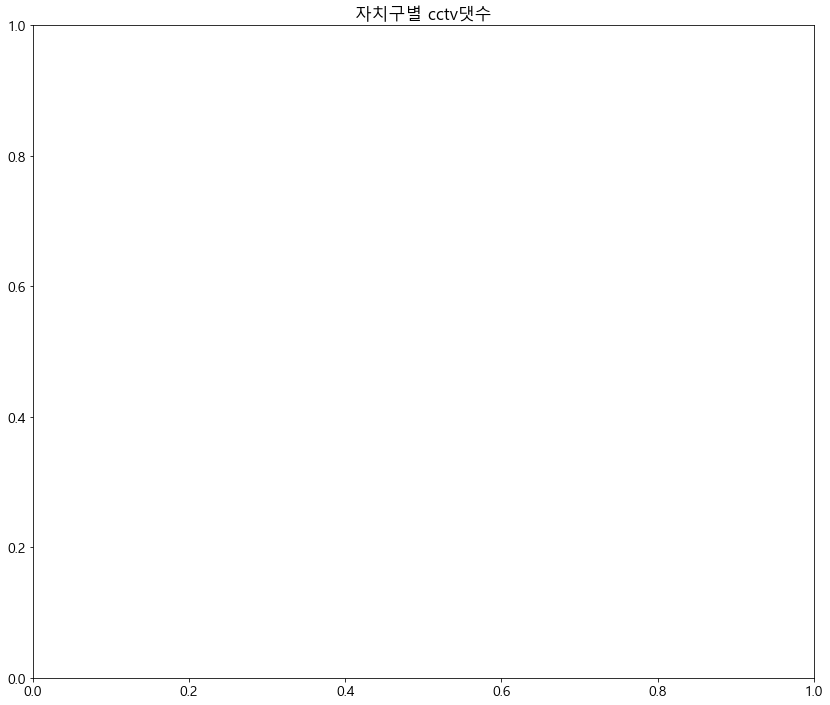

In [18]:
plt.title('자치구별 cctv댓수')
df['소계'].sort_values().plt(kind='barh',grid=True)
plt.show()

9. CCTV 현황을 다양한 형태로 시각화하여 보여준다.

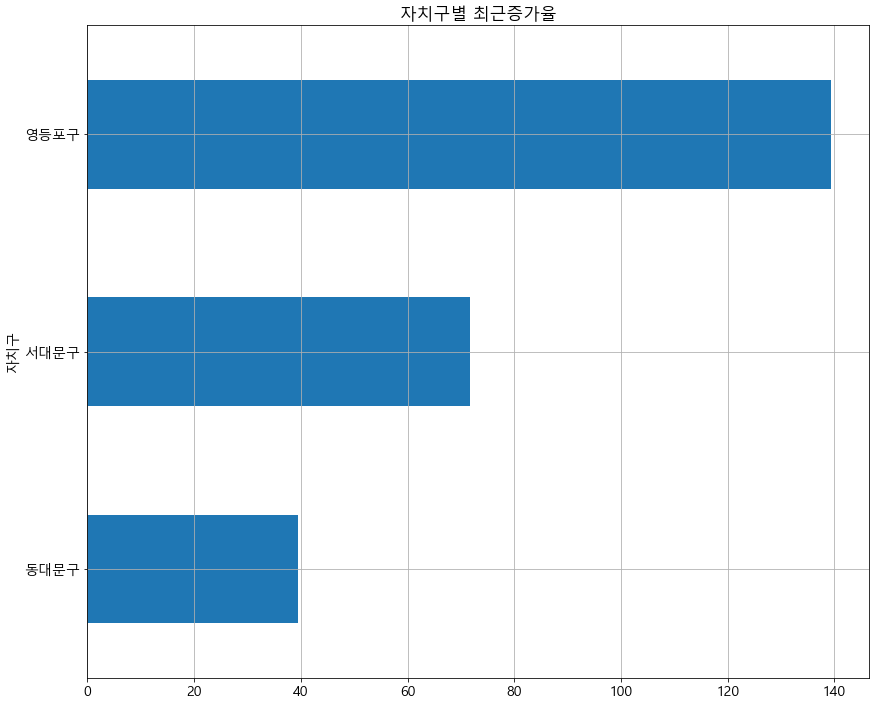

In [19]:
df['최근 증가율'].sort_values().plot(kind='barh',grid=True)
plt.title('자치구별 최근증가율')
plt.show()

# 인구수와 cctv 댓수의 산정도?

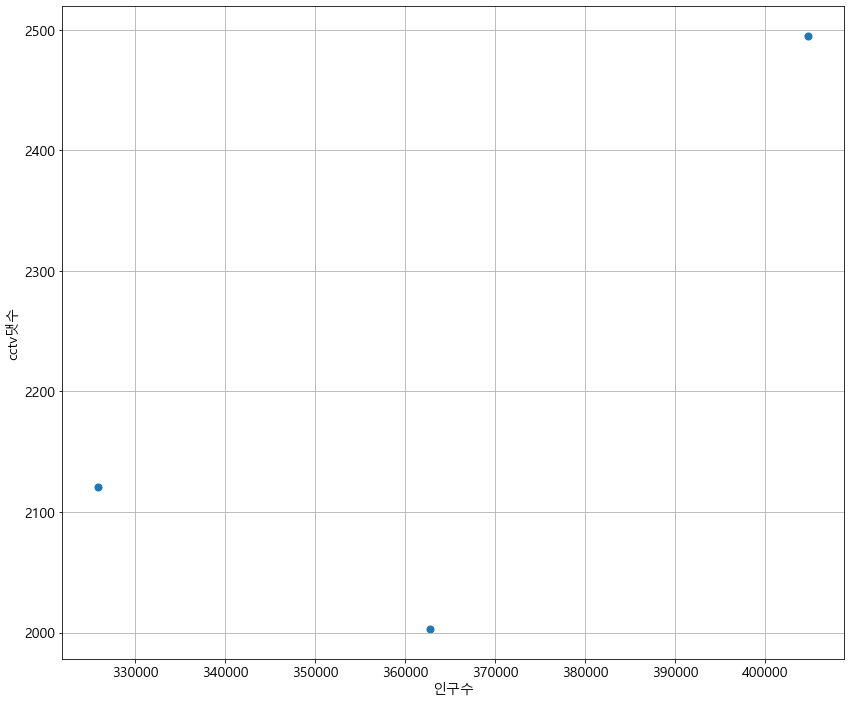

In [20]:

plt.scatter(df['인구수'],df['소계'],s=50)
plt.xlabel('인구수')
plt.ylabel('cctv댓수')
plt.grid()
plt.show()

# 인구수와 cctv댓수의 산정도 휘귀선

In [21]:
fpl=np.polyfit(df['인구수'],df['소계'],1)
fpl

array([4.89916194e-03, 4.20696586e+02])

In [22]:
f1=np.polyid(fp1)
fx=np.linspace(100000,700000,101)

AttributeError: module 'numpy' has no attribute 'polyid'

# 산정도 휘귀도 및 자치구도

In [23]:
df.head()

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
자치구,,,,,,,,
동대문구,2003,39.387613,362793,346156,16637,60367,4.585811,16.639516
서대문구,2121,71.740891,325875,312642,13233,53038,4.060759,16.275566
영등포구,2495,139.443378,404766,371903,32863,59373,8.119012,14.668475


In [25]:
df['오차']=np.abs(df['소계']-f1(df['인구수']))
df.head()

NameError: name 'f1' is not defined

In [27]:
df_sort=df.sort_values(by='오차',acending=False)
df_sort.head(10)

TypeError: sort_values() got an unexpected keyword argument 'acending'